In [1]:
# ok we want a metric to be able to predict when the source segmentation is going to be messed up in FUV 
# usually this involves high contrast in the background estimation / rms which is the threshold 
# also usually means a section has much lower count rates so that some pixels may even be empty 

# ideas: 
# RMS, stdev
# ratio of 0 background / threshold to not 0? in terms of pixels 
# rotate the eclipse a few times and calculate the ratio of pixel values between two halves
# select pixels from 4 axis of eclipse and see how different they are for threshold mask

# not a "stat":
# image segmentation on the threshold map at large scale 
# use dispersion to make a new, better threshold map 

In [10]:
import os
import pyarrow as pa
import pyarrow.parquet as parquet
from astropy.io import fits
import pandas as pd
import sys 
sys.path.insert(0, '/home/bekah/gPhoton2')
from gPhoton.io.mast import download_data
import matplotlib.pyplot as plt 

from photutils.background import Background2D, MedianBackground
from astropy.stats import SigmaClip
import numpy as np

In [3]:
def centile_clip(image, centiles=(1, 99)):
    """
    simple clipping function that clips values above and below a given
    percentile range
    """
    finite = np.ma.masked_invalid(image)
    bounds = np.percentile(finite[~finite.mask].data, centiles)
    result = np.ma.clip(finite, *bounds)
    
    if isinstance(image, np.ma.MaskedArray):
        
        return result
    
    return result.data

In [23]:
e4112_nosub = fits.open("/media/bekah/BekahA/background_test/e14112_FUV_threshold_lessthan1Flat.fits")

In [24]:
cnt_image = e4112_nosub[1].data

In [7]:
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = MedianBackground()
bkg = Background2D(cnt_image,
                       (50, 50),
                       filter_size=(3, 3),
                       bkg_estimator=bkg_estimator,
                       sigma_clip=sigma_clip)

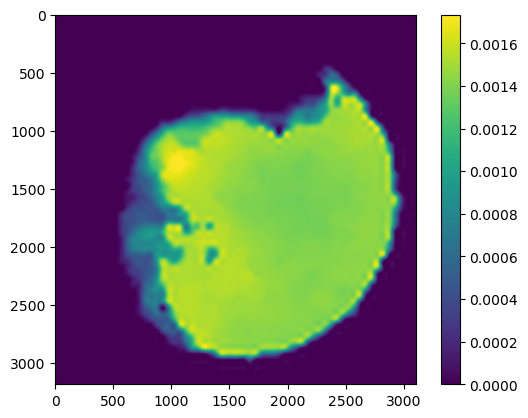

In [8]:
plt.imshow(bkg.background)
plt.colorbar()

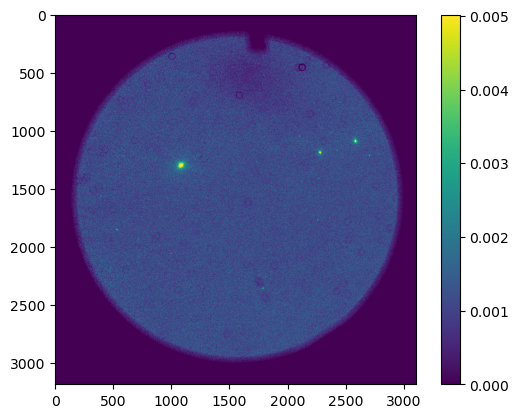

In [11]:
plt.imshow(centile_clip(cnt_image))
plt.colorbar()

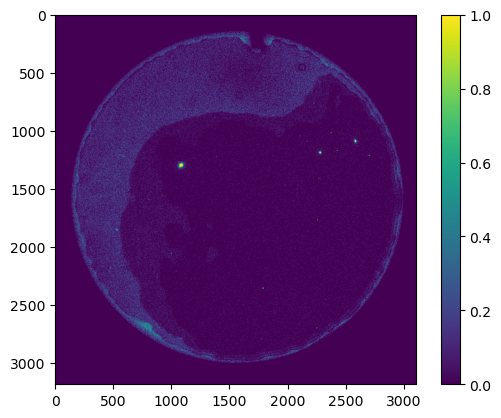

In [14]:
plt.imshow((cnt_image-bkg.background)>np.multiply(3,bkg.background_rms))
plt.colorbar()

(array([5501542.,  164985.,  210885.,  152479.,  162341.,  143452.,
         118797.,  480369., 2745368.,  218912.]),
 array([0.        , 0.00017345, 0.00034689, 0.00052034, 0.00069379,
        0.00086723, 0.00104068, 0.00121413, 0.00138757, 0.00156102,
        0.00173447]),
 <BarContainer object of 10 artists>)

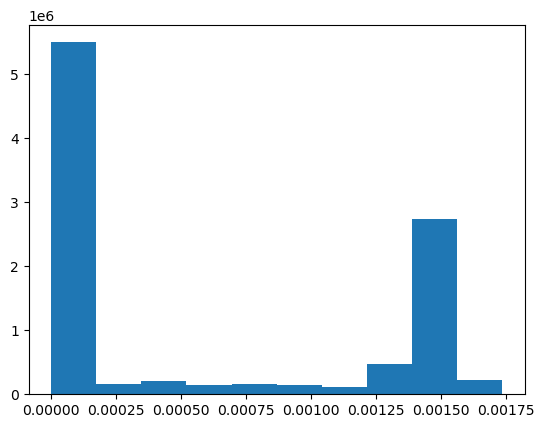

In [16]:
plt.hist(np.ravel(bkg.background))

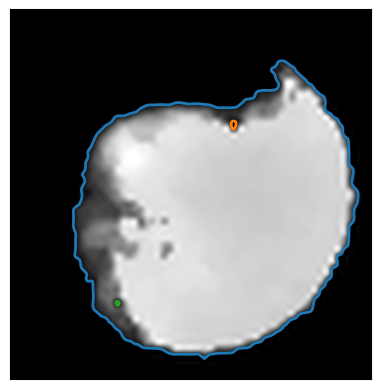

In [21]:
# https://scikit-image.org/docs/stable/auto_examples/edges/plot_contours.html#sphx-glr-auto-examples-edges-plot-contours-py
from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(bkg.background, 0.0001)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(bkg.background, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


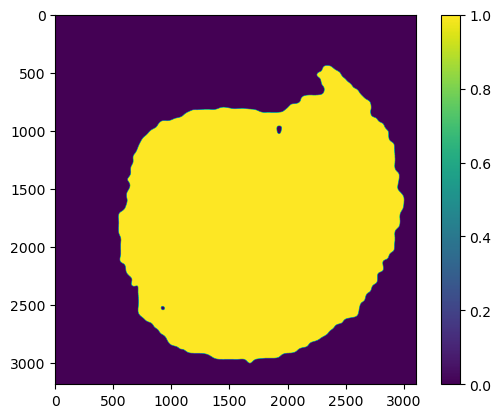

In [22]:
plt.imshow(bkg.background>.0001)
plt.colorbar()

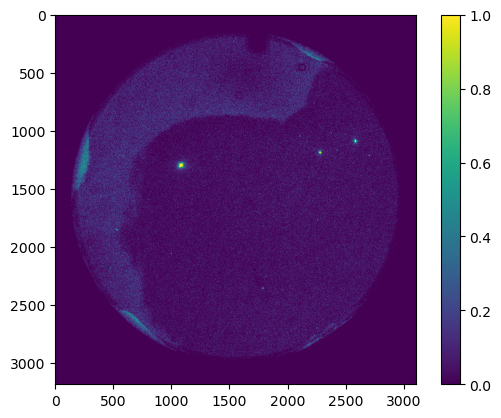

In [27]:
plt.imshow(e4112_nosub[1].data>e4112_nosub[3].data)
plt.colorbar()